In [11]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pickle
import os

In [18]:
df = pd.read_csv("./data/augmented_labeled_data.csv")
print("Shape of the Dataset : ", df.shape)
df.tail()

Shape of the Dataset :  (10533, 6)


,source,type,text,image_url,is_promo,is_promotional
10528,flipkart,a,₹191₹599 68% Body wash,NaN,True,1
10529,flipkart,a,"2. AVI Fitted single size Brea...3.918,005 Rat...",NaN,True,1
10530,flipkart,div,₹695 68%,NaN,True,1
10531,flipkart,a,"3. SunScoop sunscreen - SPF 50...4.32,269 Rati...",NaN,True,1
10532,flipkart,a,"4. BARE anatomy Anti-Dandruff ...4.21,13,639 R...",NaN,True,1


In [ ]:
df.drop_duplicates(inplace=True)

In [20]:
df.dropna(subset=["text"], inplace=True)
df = df[df["text"].str.strip() != ""]

In [25]:
df["is_promotional"] = df["is_promotional"].astype(bool)

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", " ", text)  
    text = re.sub(r"\s+", " ", text).strip()  
    return text

In [27]:
df["text_clean"] = df["text"].apply(clean_text)

In [29]:
print("Cleaned Shape:", df.shape)
df.tail()

Cleaned Shape: (10497, 7)


,source,type,text,image_url,is_promo,is_promotional,text_clean
10528,flipkart,a,₹191₹599 68% Body wash,NaN,True,True,191 599 68 body wash
10529,flipkart,a,"2. AVI Fitted single size Brea...3.918,005 Rat...",NaN,True,True,2 avi fitted single size brea 3 918 005 rating...
10530,flipkart,div,₹695 68%,NaN,True,True,695 68
10531,flipkart,a,"3. SunScoop sunscreen - SPF 50...4.32,269 Rati...",NaN,True,True,3 sunscoop sunscreen spf 50 4 32 269 ratings 2...
10532,flipkart,a,"4. BARE anatomy Anti-Dandruff ...4.21,13,639 R...",NaN,True,True,4 bare anatomy anti dandruff 4 21 13 639 ratin...


In [30]:
feature_extraction = TfidfVectorizer(
    min_df=1,
    stop_words="english",
    lowercase=True,
    max_features=5000,  
    ngram_range=(1, 2), 
)

X = feature_extraction.fit_transform(df["text_clean"])
y = df["is_promotional"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
print("X_train_shape : ", X_train.shape)
print("X_test_shape : ", X_test.shape)

X_train_shape :  (8397, 5000)
X_test_shape :  (2100, 5000)


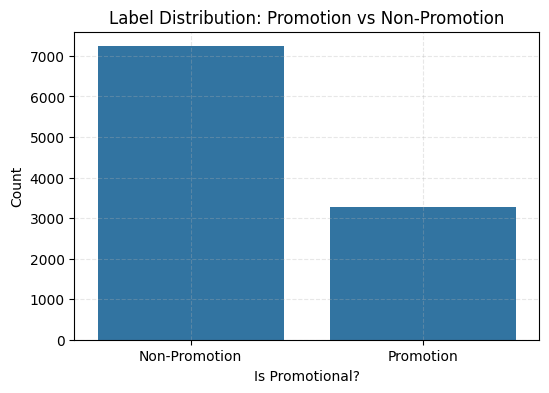

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="is_promotional")
plt.title("Label Distribution: Promotion vs Non-Promotion")
plt.xlabel("Is Promotional?")
plt.ylabel("Count")
plt.xticks([0,1], ['Non-Promotion', 'Promotion'])
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

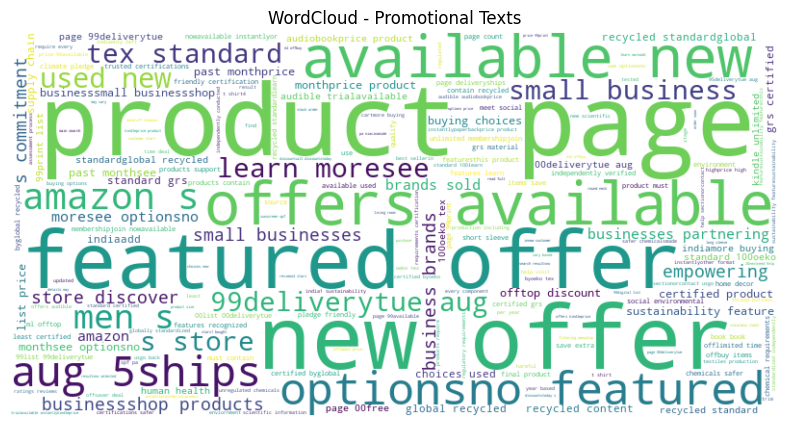

In [40]:
from wordcloud import WordCloud

promo_text = " ".join(df[df["is_promotional"]==True]["text_clean"])
nonpromo_text = " ".join(df[df["is_promotional"]==False]["text_clean"])

wordcloud_promo = WordCloud(width=800, height=400, background_color='white').generate(promo_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_promo, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Promotional Texts")
plt.show()

In [41]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report : ", classification_report(y_test, y_pred))

Accuracy: 0.9457142857142857

Classification Report :                precision    recall  f1-score   support

       False       0.93      1.00      0.96      1447
        True       0.99      0.84      0.91       653

    accuracy                           0.95      2100
   macro avg       0.96      0.92      0.93      2100
weighted avg       0.95      0.95      0.94      2100



Accuracy: 94.57 %
Precision: 0.9873417721518988
Recall: 0.8361408882082695
F1 Score: 0.9054726368159204

Classification Report:
              precision    recall  f1-score   support

       False       0.93      1.00      0.96      1447
        True       0.99      0.84      0.91       653

    accuracy                           0.95      2100
   macro avg       0.96      0.92      0.93      2100
weighted avg       0.95      0.95      0.94      2100



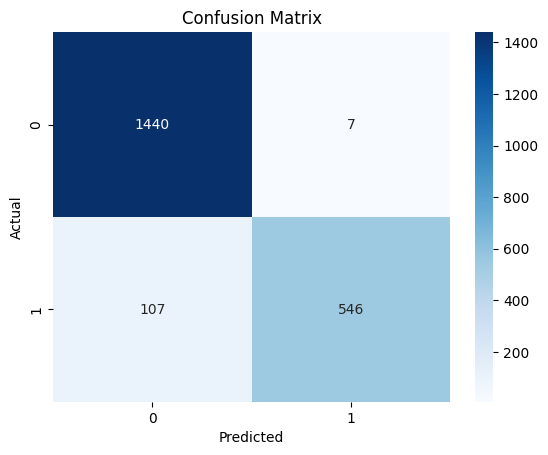

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [52]:
def predict_promotion(text):
    clean = clean_text(text)
    vector = feature_extraction.transform([clean])
    prediction = model.predict(vector)[0]
    return "Promotion" if prediction else "Non-Promotion"

sample_inputs = [
    "Up to 24% offer on all products!",
    "New arrivals for summer collection",
]

for text in sample_inputs:
    result = predict_promotion(text)
    print(f"Text: {text} --> Prediction: {result}")


Text: Up to 24% offer on all products! --> Prediction: Promotion
Text: New arrivals for summer collection --> Prediction: Non-Promotion


In [56]:
with open("./models/promo_classifier.pkl", "wb") as f:
    pickle.dump(model, f)

with open("./models/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(feature_extraction, f)